In [1]:
import numpy as np
from fancyimpute import IterativeSVD
# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.15356449 0.1971701  0.44726457 ... 0.18046033 0.02096701 0.33323525]
 [0.2373483  0.30474486 0.69128928 ... 0.27891834 0.03240647 0.51504629]
 [0.26590487 0.34141024 0.77446176 ... 0.3124764  0.03630546 0.57701408]
 ...
 [0.24711436 0.31728405 0.71973343 ... 0.29039486 0.03373988 0.53623865]
 [0.2239415  0.28753111 0.65224126 ... 0.26316342 0.03057597 0.48595349]
 [0.25797615 0.33123012 0.75136895 ... 0.30315902 0.0352229  0.55980875]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.22042577  0.09671028  0.40932943 ...  0.16003312  0.09688523
   0.18145489]
 [ 0.21694543  0.21707464  0.74816178 ...  0.24525993 -0.10104796
   0.48821185]
 [ 0.21120234  0.35317822  0.80985928 ...  0.33659399 -0.10182543
   0.572425  ]
 ...
 [ 0.0838259   0.35442529  0.73148096 ...  0.06301853  0.14383865
   0.4730038 ]
 [ 0.28359432  0.23974559  0.64487716 ...  0.20283338  0.1759765
   0.39389898]
 [ 0.18723696  0.56420093  0.70765416 ...  0.26794745 -0.12171192
   0.533

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:

noisy_matrix[1,1]=np.nan
imputed_data = IterativeSVD().fit_transform(noisy_matrix)
 

U, s, Vt = np.linalg.svd(imputed_data , full_matrices=False)
 

mycebmf= cEBMF(data= noisy_matrix,
               prior_L = "exp",
               prior_F = "exp")
K=5
K=5

[IterativeSVD] Iter 1: observed MAE=0.079101
[IterativeSVD] Iter 2: observed MAE=0.075318
[IterativeSVD] Iter 3: observed MAE=0.068873
[IterativeSVD] Iter 4: observed MAE=0.057398
[IterativeSVD] Iter 5: observed MAE=0.052975
[IterativeSVD] Iter 6: observed MAE=0.052977
[IterativeSVD] Iter 7: observed MAE=0.052974
[IterativeSVD] Iter 8: observed MAE=0.052973
[IterativeSVD] Iter 9: observed MAE=0.052971
[IterativeSVD] Iter 10: observed MAE=0.052970
[IterativeSVD] Iter 11: observed MAE=0.052969
[IterativeSVD] Iter 12: observed MAE=0.052969
[IterativeSVD] Iter 13: observed MAE=0.052968
[IterativeSVD] Iter 14: observed MAE=0.052968
[IterativeSVD] Iter 15: observed MAE=0.052967


In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

The array contains missing values (NaN), generate initialization using iterive svd.
[IterativeSVD] Iter 1: observed MAE=0.079101
[IterativeSVD] Iter 2: observed MAE=0.075318
[IterativeSVD] Iter 3: observed MAE=0.068873
[IterativeSVD] Iter 4: observed MAE=0.057398
[IterativeSVD] Iter 5: observed MAE=0.052975
[IterativeSVD] Iter 6: observed MAE=0.052977
[IterativeSVD] Iter 7: observed MAE=0.052974
[IterativeSVD] Iter 8: observed MAE=0.052973
[IterativeSVD] Iter 9: observed MAE=0.052971
[IterativeSVD] Iter 10: observed MAE=0.052970
[IterativeSVD] Iter 11: observed MAE=0.052969
[IterativeSVD] Iter 12: observed MAE=0.052969
[IterativeSVD] Iter 13: observed MAE=0.052968
[IterativeSVD] Iter 14: observed MAE=0.052968
[IterativeSVD] Iter 15: observed MAE=0.052967
[-0.03218624 -0.047532   -0.09760982  0.35114503  0.15867998 -0.21887607
  0.11347387 -0.09480781  0.069449    0.09522612 -0.01511251  0.09956496
  0.14522229 -0.28073199 -0.15166972 -0.31710127 -0.20010588  0.12549317
  0.2165548   0.

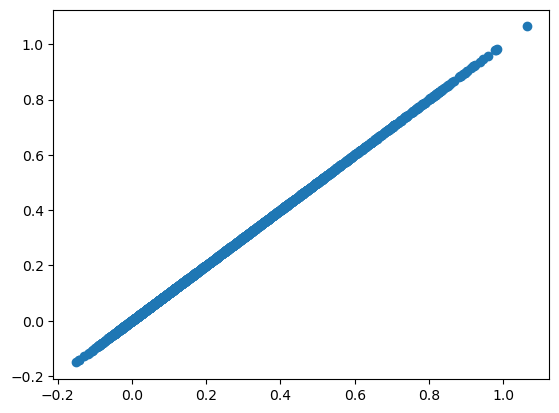

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

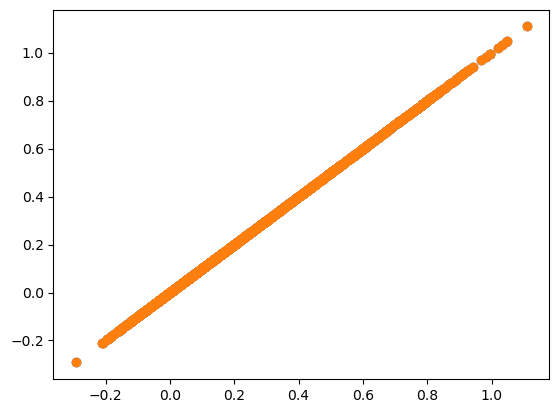

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
1/mycebmf.tau

array([[0.00689424, 0.00689424, 0.00689424, ..., 0.00689424, 0.00689424,
        0.00689424],
       [0.00689424, 0.00689424, 0.00689424, ..., 0.00689424, 0.00689424,
        0.00689424],
       [0.00689424, 0.00689424, 0.00689424, ..., 0.00689424, 0.00689424,
        0.00689424],
       ...,
       [0.00689424, 0.00689424, 0.00689424, ..., 0.00689424, 0.00689424,
        0.00689424],
       [0.00689424, 0.00689424, 0.00689424, ..., 0.00689424, 0.00689424,
        0.00689424],
       [0.00689424, 0.00689424, 0.00689424, ..., 0.00689424, 0.00689424,
        0.00689424]])

In [9]:
 
mycebmf.update_loading_factor_k(k=0)

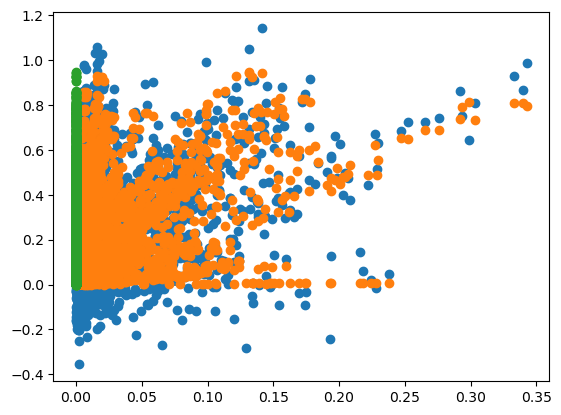

In [10]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

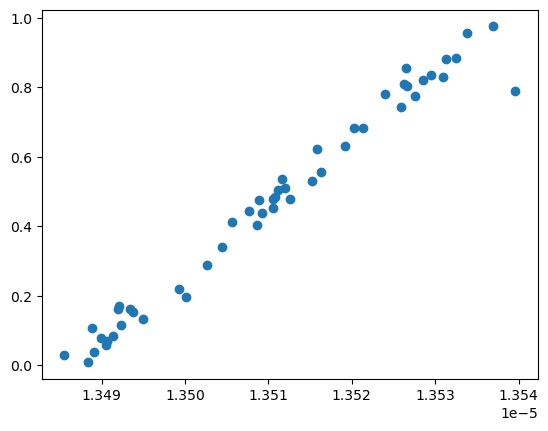

In [11]:
plt.scatter(mycebmf.L[:,0], u)

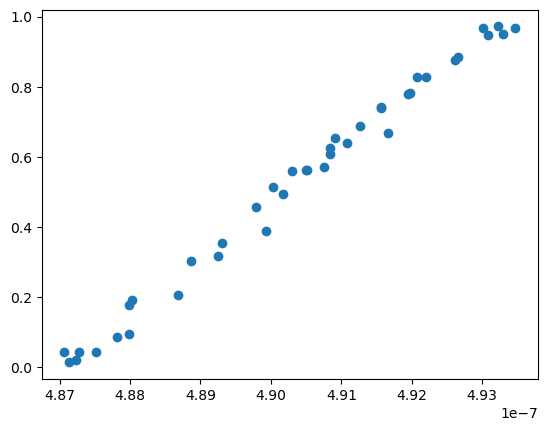

In [12]:
plt.scatter(mycebmf.F[:,0], v)

In [13]:
np.zeros_like(range(10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
mycebmf.kl_l

array([  0, 110,  81,  63,  90])

In [15]:
k=1

mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z =mycebmf.Rk,
                                                            nu =mycebmf.F[:,k] ,
                                                            omega=mycebmf.F2[:,k], 
                                                            tau=mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
     
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     =mycebmf.prior_L,
                      verbose=False
                      )
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2
        
mycebmf.kl_f[k]=  normal_means_loglik(lhat , 
                                           s_l,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )
        
fhat , s_f  = compute_hat_f_and_s_f(Z =mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  ,
                                                            has_nan=mycebmf.has_nan)
ash_obj = ash(betahat   = fhat, 
                      sebetahat = s_f ,
                      prior     = mycebmf.prior_F,
                      verbose=False
                      )
mycebmf.F  [:,k] =ash_obj.post_mean
mycebmf.F2 [:,k] =ash_obj.post_mean2
mycebmf.kl_f[k]=  normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

In [16]:
normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

-299.8498060513514

In [17]:
mycebmf.tau

array([[7.32751888, 7.32751888, 7.32751888, ..., 7.32751888, 7.32751888,
        7.32751888],
       [7.32751888, 7.32751888, 7.32751888, ..., 7.32751888, 7.32751888,
        7.32751888],
       [7.32751888, 7.32751888, 7.32751888, ..., 7.32751888, 7.32751888,
        7.32751888],
       ...,
       [7.32751888, 7.32751888, 7.32751888, ..., 7.32751888, 7.32751888,
        7.32751888],
       [7.32751888, 7.32751888, 7.32751888, ..., 7.32751888, 7.32751888,
        7.32751888],
       [7.32751888, 7.32751888, 7.32751888, ..., 7.32751888, 7.32751888,
        7.32751888]])

In [18]:
mycebmf.iter()

print(mycebmf.kl_l)
print(mycebmf.kl_f  )


[  0 299 195 181  60]
[  0 308 103  71   4]


In [19]:
print( -0.5*np.sum (mycebmf.n_nonmissing* (np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 )))
print(mycebmf.kl_l  )
print(mycebmf.kl_f  )
print(mycebmf.tau[0,0] )
print( np.sum(mycebmf.kl_l+mycebmf.kl_f)-0.5*np.sum (mycebmf.n_nonmissing* np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 ))
print(mycebmf.obj)

-913.4287338795122
[  0 299 195 181  60]
[  0 308 103  71   4]
6.848237977969668
-615.496132181295
[inf, 2616.183024417814, 307.57126612048785]


In [20]:
mycebmf.iter()
print(mycebmf.obj)

[inf, 2616.183024417814, 307.57126612048785, -95.1821865683238]


In [21]:
for i in range(20):
    mycebmf.iter()



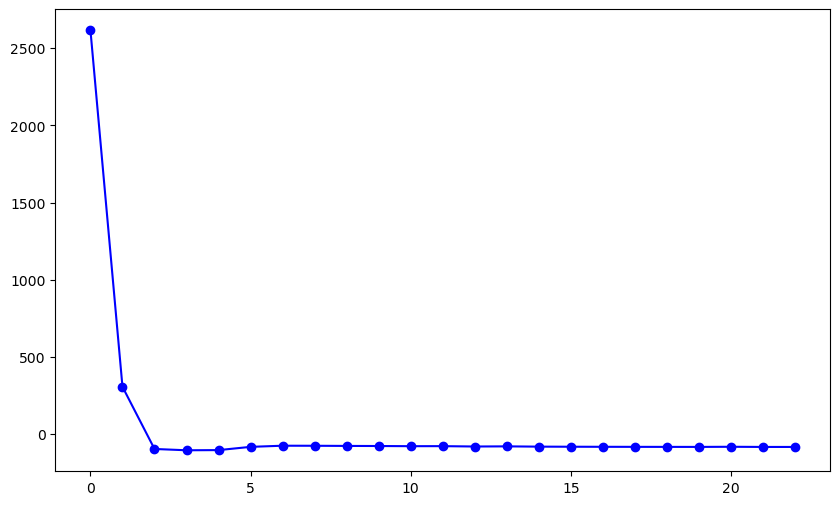

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

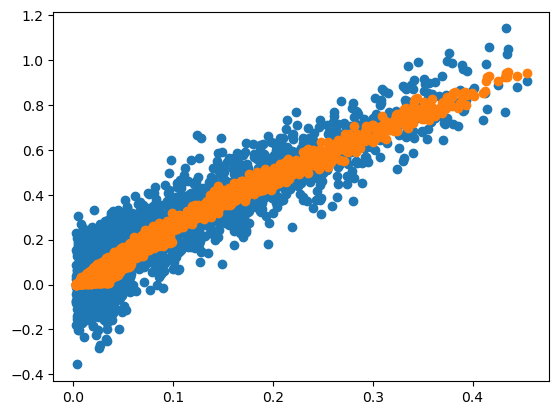

In [23]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
